In [52]:
import numpy as np
from matplotlib import pyplot as plt

import csv
import sys
ROOT = "../../"
sys.path.append(ROOT) # Add root directory to path

In [169]:
experiment_log_folder_path = ROOT + "notebooks/experiment_log/"
inf = float('inf')

random_filename = "FRESH_CNN_CIFAR_10_4.csv"
random_perturbations = []
random_test_accuracies = []
random_adversarial_accuracies = []

with open(experiment_log_folder_path + random_filename, 'r') as file:
    csv_reader = csv.DictReader(file, delimiter=',')
    for row in csv_reader:
        random_perturbations.append(eval(row['perturbations']))
        random_test_accuracies.append(float(row['baseline_test_accuracy']))
        random_adversarial_accuracies.append(float(row['adversarial_accuracy_eps=0.025']))

fixed_filename = "FRESH_CNN_CIFAR_10_4_NoShuffle.csv"
fixed_perturbations = []
fixed_test_accuracies = []
fixed_adversarial_accuracies = []

with open(experiment_log_folder_path + fixed_filename, 'r') as file:
    csv_reader = csv.DictReader(file, delimiter=',')
    for row in csv_reader:
        fixed_perturbations.append(eval(row['perturbations']))
        fixed_test_accuracies.append(float(row['baseline_test_accuracy']))
        fixed_adversarial_accuracies.append(float(row['adversarial_accuracy_eps=0.025']))

test_accuracies_difference_shuffling = [fixed_test_accuracies[i] - random_test_accuracies[i] for i in range(len(fixed_test_accuracies))]
adversarial_accuracies_difference_shuffling = [fixed_adversarial_accuracies[i] - random_adversarial_accuracies[i] for i in range(len(fixed_adversarial_accuracies))]
average_test_accuracy_diff_shuffling = np.mean(test_accuracies_difference_shuffling)
average_adversarial_accuracy_diff_shuffling = np.mean(adversarial_accuracies_difference_shuffling)
std_test_accuracy_diff_shuffling = np.std(test_accuracies_difference_shuffling)
std_adversarial_accuracy_diff_shuffling = np.std(adversarial_accuracies_difference_shuffling)

IO_filename = "FRESH_CNN_CIFAR_10_4_IncludeOriginal.csv"
IO_perturbations = []
IO_test_accuracies = []
IO_adversarial_accuracies = []

with open(experiment_log_folder_path + IO_filename, 'r') as file:
    csv_reader = csv.DictReader(file, delimiter=',')
    for row in csv_reader:
        IO_perturbations.append(eval(row['perturbations']))
        IO_test_accuracies.append(float(row['baseline_test_accuracy']))
        IO_adversarial_accuracies.append(float(row['adversarial_accuracy_eps=0.025']))

test_accuracies_difference_IO = [IO_test_accuracies[i] - random_test_accuracies[i] for i in range(len(fixed_test_accuracies))]
adversarial_accuracies_difference_IO = [IO_adversarial_accuracies[i] - random_adversarial_accuracies[i] for i in range(len(fixed_adversarial_accuracies))]
average_test_accuracy_diff_IO = np.mean(test_accuracies_difference_IO)
average_adversarial_accuracy_diff_IO = np.mean(adversarial_accuracies_difference_IO)
std_test_accuracy_diff_IO = np.std(test_accuracies_difference_IO)
std_adversarial_accuracy_diff_IO = np.std(adversarial_accuracies_difference_IO)

single_filename = "FRESH_CNN_CIFAR_10_3.csv"
single_perturbations = []
single_test_accuracies = []
single_adversarial_accuracies = []

with open(experiment_log_folder_path + single_filename, 'r') as file:
    csv_reader = csv.DictReader(file, delimiter=',')
    for row in csv_reader:
        single_perturbations.append(eval(row['perturbations']))
        single_test_accuracies.append(float(row['baseline_test_accuracy']))
        single_adversarial_accuracies.append(float(row['adversarial_accuracy_eps=0.025']))

perturbation_number = [len(perturbations) for perturbations in random_perturbations]

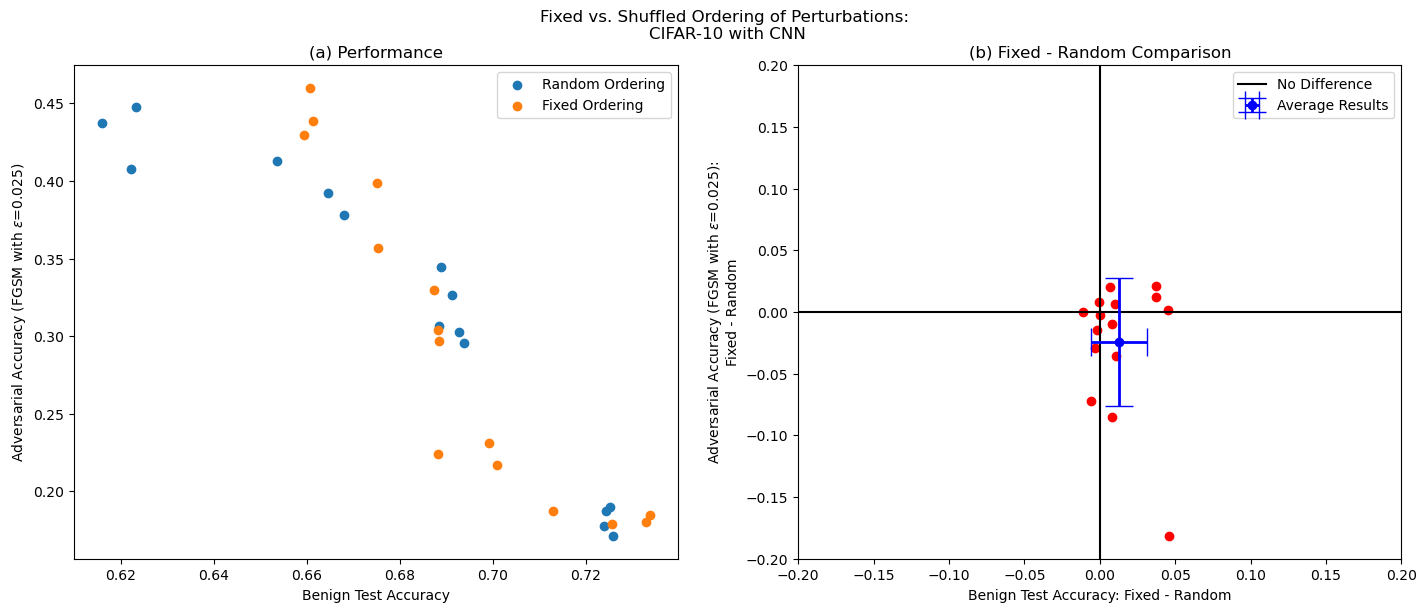

In [170]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

fig.suptitle("Fixed vs. Shuffled Ordering of Perturbations: \nCIFAR-10 with CNN")
fig.tight_layout()
plt.subplots_adjust(wspace=0.2)

axs[0].scatter(random_test_accuracies, random_adversarial_accuracies, label="Random Ordering")
axs[0].scatter(fixed_test_accuracies, fixed_adversarial_accuracies, label="Fixed Ordering")
axs[0].set_xlabel("Benign Test Accuracy")
axs[0].set_ylabel(r"Adversarial Accuracy (FGSM with $\varepsilon$=0.025)")
axs[0].set_title("(a) Performance")
axs[0].legend()

axs[1].scatter(test_accuracies_difference_shuffling, adversarial_accuracies_difference_shuffling, color='red')
axs[1].set_xlabel("Benign Test Accuracy: Fixed - Random")
axs[1].set_ylabel(r"Adversarial Accuracy (FGSM with $\varepsilon$=0.025):" + "\nFixed - Random")
axs[1].set_title("(b) Fixed - Random Comparison")
axs[1].set_xlim(-0.2, 0.2)
axs[1].set_ylim(-0.2, 0.2)

axs[1].axhline(0, linestyle="-", c='black', label="No Difference")
# axs[1].axhline(average_adversarial_accuracy_diff, linestyle="-", c='blue', label="Average Results")

axs[1].axvline(0, linestyle="-", c='black')
# axs[1].axvline(average_test_accuracy_diff, linestyle="-", c='blue')

axs[1].errorbar(average_test_accuracy_diff_shuffling, average_adversarial_accuracy_diff_shuffling,
                xerr=std_test_accuracy_diff_shuffling, yerr=std_adversarial_accuracy_diff_shuffling,
                fmt='o', color='blue', linewidth=2, capsize=10, label="Average Results")
axs[1].legend()

plt.show()

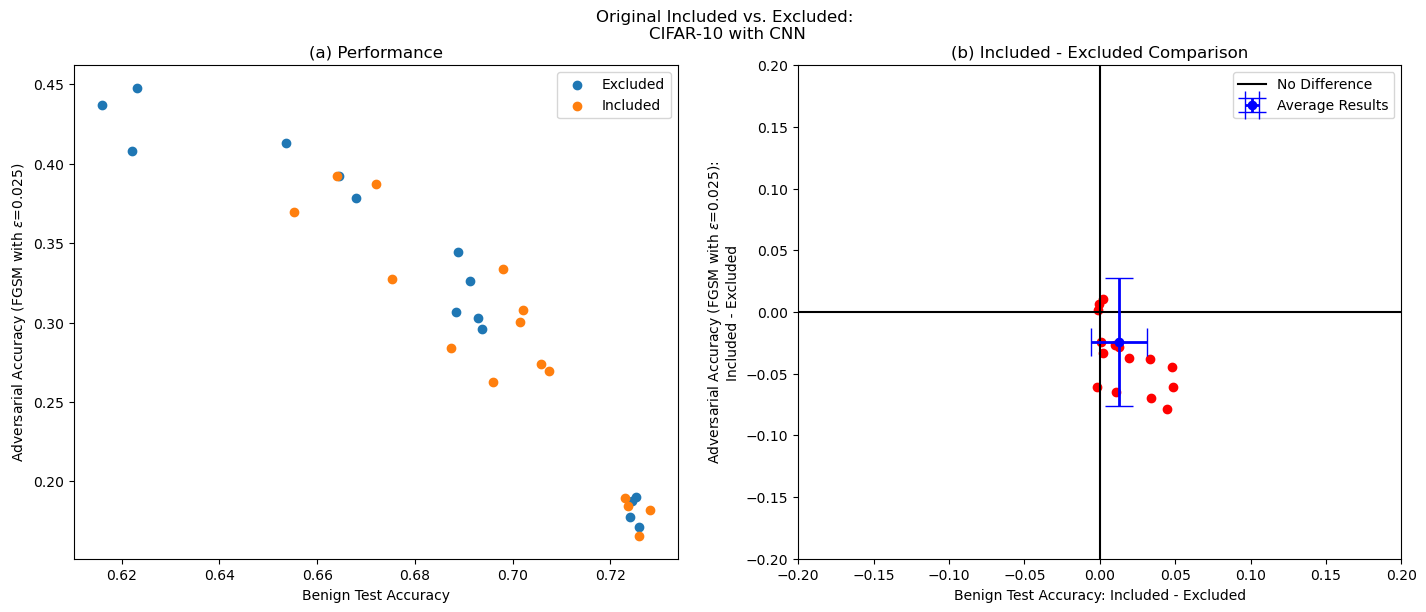

In [171]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

fig.suptitle("Original Included vs. Excluded: \nCIFAR-10 with CNN")
fig.tight_layout()
plt.subplots_adjust(wspace=0.2)

axs[0].scatter(random_test_accuracies, random_adversarial_accuracies, label="Excluded")
axs[0].scatter(IO_test_accuracies, IO_adversarial_accuracies, label="Included")
axs[0].set_xlabel("Benign Test Accuracy")
axs[0].set_ylabel(r"Adversarial Accuracy (FGSM with $\varepsilon$=0.025)")
axs[0].set_title("(a) Performance")
axs[0].legend()

axs[1].scatter(test_accuracies_difference_IO, adversarial_accuracies_difference_IO, color='red')
axs[1].set_xlabel("Benign Test Accuracy: Included - Excluded")
axs[1].set_ylabel(r"Adversarial Accuracy (FGSM with $\varepsilon$=0.025):" + "\nIncluded - Excluded")
axs[1].set_title("(b) Included - Excluded Comparison")
axs[1].set_xlim(-0.2, 0.2)
axs[1].set_ylim(-0.2, 0.2)

axs[1].axhline(0, linestyle="-", c='black', label="No Difference")
# axs[1].axhline(average_adversarial_accuracy_diff, linestyle="-", c='blue', label="Average Results")

axs[1].axvline(0, linestyle="-", c='black')
# axs[1].axvline(average_test_accuracy_diff, linestyle="-", c='blue')

axs[1].errorbar(average_test_accuracy_diff_shuffling, average_adversarial_accuracy_diff_shuffling,
                xerr=std_test_accuracy_diff_shuffling, yerr=std_adversarial_accuracy_diff_shuffling,
                fmt='o', color='blue', linewidth=2, capsize=10, label="Average Results")
axs[1].legend()

plt.show()

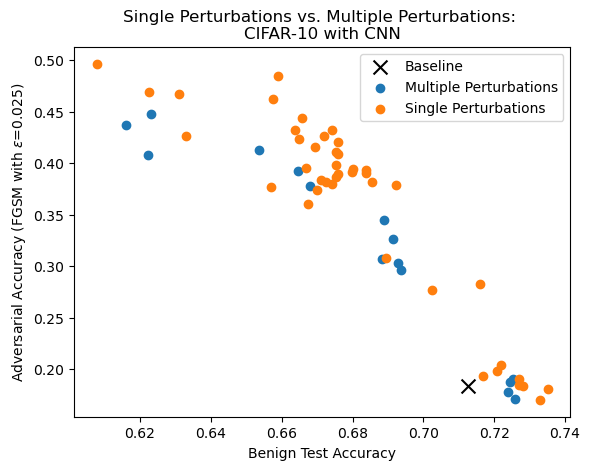

In [89]:
plt.figure()
plt.scatter(single_test_accuracies[0], single_adversarial_accuracies[0], label="Baseline", marker='x', s=100, c='black')
plt.scatter(random_test_accuracies, random_adversarial_accuracies, label="Multiple Perturbations")
plt.scatter(single_test_accuracies[1:], single_adversarial_accuracies[1:], label="Single Perturbations")
plt.xlabel("Benign Test Accuracy")
plt.ylabel(r"Adversarial Accuracy (FGSM with $\varepsilon$=0.025)")
plt.title("Single Perturbations vs. Multiple Perturbations: \nCIFAR-10 with CNN")
plt.legend()
plt.show()

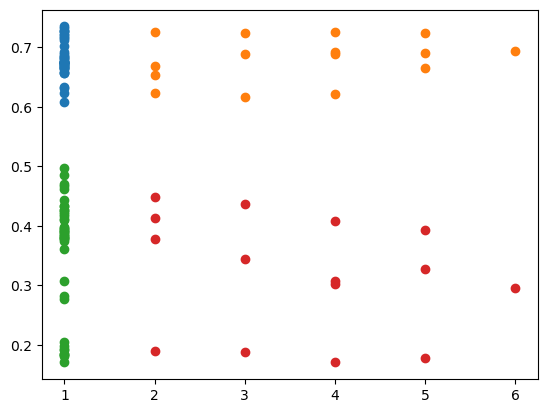

In [69]:
plt.figure()
plt.scatter(np.ones(len(single_perturbations)), single_test_accuracies)
plt.scatter(perturbation_number, random_test_accuracies)

plt.scatter(np.ones(len(single_perturbations)), single_adversarial_accuracies)
plt.scatter(perturbation_number, random_adversarial_accuracies)
plt.show()